# Calculate zonal mean over South America

Using the functions in icons packages

In [1]:
####importing packages
import sys
sys.path.append('/home/m/m300876/python/packages/')
import icons
from pathlib import Path
import importlib
import numpy as np


/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages/dask_jobqueue/core.py:20: FutureWarning: tmpfile is deprecated and will be removed in a future release. Please use dask.utils.tmpfile instead.
  from distributed.utils import tmpfile


In [2]:
icons.prepare_cpu(memory='64GB')

Number of CPUs: 256, number of threads: 256, number of workers: 1, processes: False


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /user/m300876/levante-spawner-advanced//proxy/37885/status,
Dashboard: /user/m300876/levante-spawner-advanced//proxy/37885/status,Workers: 1
Total threads: 256,Total memory: 59.60 GiB
Status: running,Using processes: False
Comm: inproc://136.172.122.107/4146914/1,Workers: 1
Dashboard: /user/m300876/levante-spawner-advanced//proxy/37885/status,Total threads: 256
Started: Just now,Total memory: 59.60 GiB
Comm: inproc://136.172.122.107/4146914/4,Total threads: 256
Dashboard: /user/m300876/levante-spawner-advanced//proxy/40729/status,Memory: 59.60 GiB
Nanny: None,


In [3]:
#Define a global pattern to find the files
glob_pattern_3d1 = 'atm_2d_ml'
## Define the paths of file 1 (dppp0016)
data_path1 = Path('/work/bm1235/k203123/experiments/ngc2006')
## Collect all file names with pathlib's rglob and list compression 
files01 = sorted([str(f) for f in data_path1.glob(f'run*/*{glob_pattern_3d1}*')])[:]

In [4]:
time = ['2020-02-01','2020-03-31']

In [5]:
%time zonal_pr_mean = icons.zonal_mean(files01,'pr',time,[-20,10],[-80,-30],0.5,'1D',mask=1,better_time=False)

CPU times: user 4min 17s, sys: 3min 21s, total: 7min 39sted |  4min 12.8s
Wall time: 4min 51s


**Plotting**

In [7]:
from matplotlib import pyplot as plt # Standard Plotting library

Text(0.5, 0, 'Latitude')

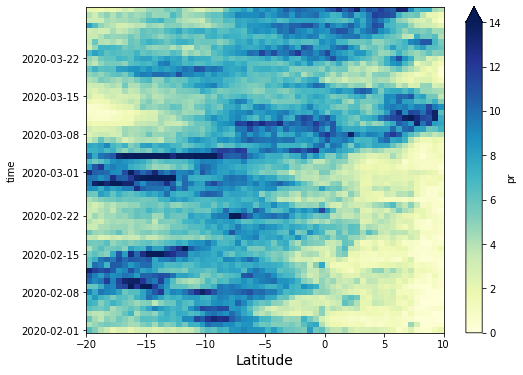

In [11]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
(zonal_pr_mean*3600*24).plot(cmap='YlGnBu',vmin=0,vmax=14)
ax.set_xlabel('Latitude',fontsize=14)